--- Part A: Binary Classification (Breast Cancer Dataset) ---

### Performance Summary of SVM Models ###
        Model  Kernel                    Parameters  Accuracy  Precision    Recall  F1-Score
0  SVM_Linear  linear  C=1.0, gamma=scale, degree=3  0.976608   0.981481  0.981481  0.981481
1    SVM_Poly    poly  C=1.0, gamma=scale, degree=3  0.894737   0.857143  1.000000  0.923077
2   SVM_RBF_1     rbf  C=1.0, gamma=scale, degree=3  0.976608   0.981481  0.981481  0.981481
3   SVM_RBF_2     rbf  C=10.0, gamma=0.01, degree=3  0.988304   0.981818  1.000000  0.990826


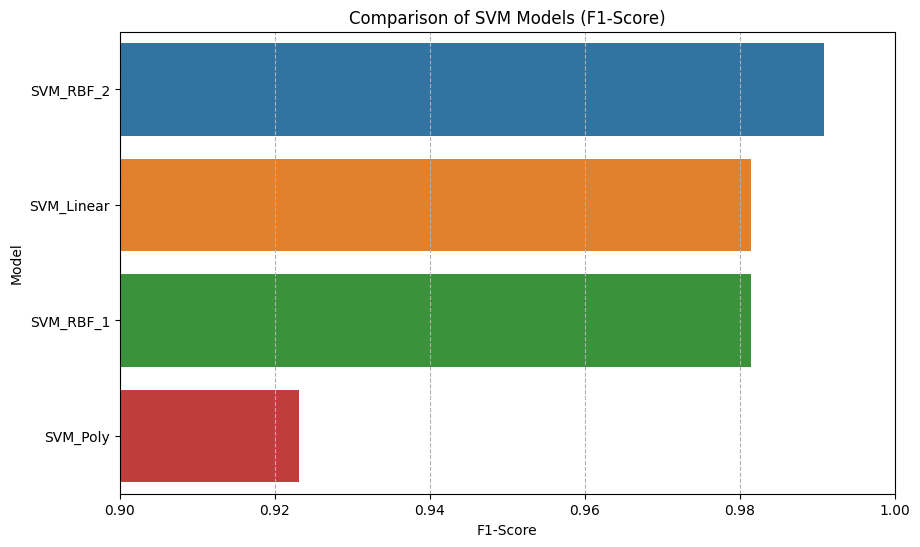


--- Detailed Analysis of the Best Model: SVM_RBF_2 ---



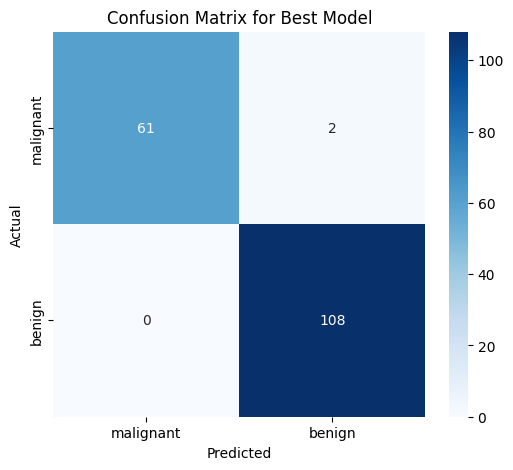

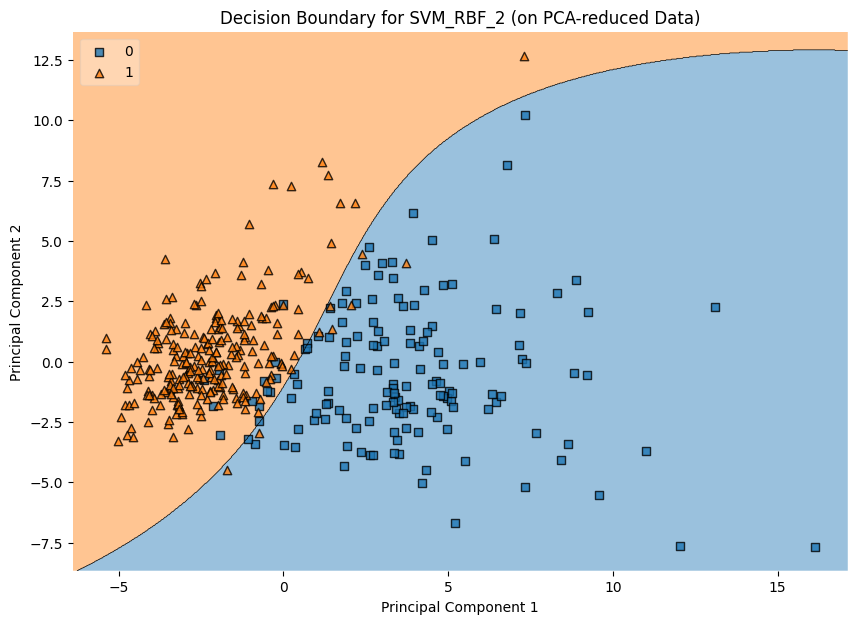

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

print("--- Part A: Binary Classification (Breast Cancer Dataset) ---\n")
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "SVM_Linear": SVC(kernel='linear', C=1.0, probability=True, random_state=42),
    "SVM_Poly": SVC(kernel='poly', degree=3, C=1.0, probability=True, random_state=42),
    "SVM_RBF_1": SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42),
    "SVM_RBF_2": SVC(kernel='rbf', C=10.0, gamma=0.01, probability=True, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    params = model.get_params()
    results.append({
        "Model": name,
        "Kernel": params['kernel'],
        "Parameters": f"C={params['C']}, gamma={params.get('gamma', 'N/A')}, degree={params.get('degree', 'N/A')}",
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
print("### Performance Summary of SVM Models ###")
print(results_df.to_string())

plt.figure(figsize=(10, 6))
sns.barplot(x='F1-Score', y='Model', data=results_df.sort_values('F1-Score', ascending=False))
plt.title('Comparison of SVM Models (F1-Score)')
plt.xlabel('F1-Score')
plt.ylabel('Model')
plt.xlim(0.9, 1.0)
plt.grid(axis='x', linestyle='--')
plt.show()

best_model_name = results_df.loc[results_df['F1-Score'].idxmax()]['Model']
best_model = models[best_model_name]
print(f"\n--- Detailed Analysis of the Best Model: {best_model_name} ---\n")

y_pred_best = best_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix for Best Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

y_prob_best = best_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_best)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
model_2d = SVC(kernel='rbf', C=10.0, gamma=0.01, random_state=42)
model_2d.fit(X_train_pca, y_train)

plt.figure(figsize=(10, 7))
plot_decision_regions(X_train_pca, y_train.to_numpy(), clf=model_2d, legend=2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'Decision Boundary for {best_model_name} (on PCA-reduced Data)')
plt.show()